In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("mbti_1.csv")

In [3]:
df.head(10)

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...
6,INFJ,"'No, I can't draw on my own nails (haha). Thos..."
7,INTJ,'I tend to build up a collection of things on ...
8,INFJ,"I'm not sure, that's a good question. The dist..."
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...


In [4]:
len(df)

8675

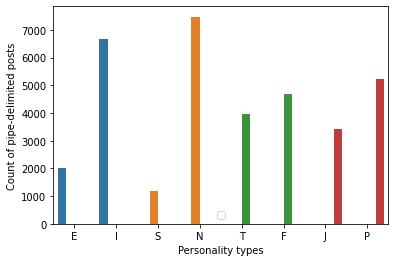

In [5]:
tot_mbti_posts=[]
for i in "EISNTFJP":
    tot_mbti_posts.append(sum([1 if i in x else 0 for x in df['type']]))
    
total_per_posts_df=pd.DataFrame(zip(tot_mbti_posts,['E','I','S','N','T','F','J','P']
                                    ,['EI','EI','SN','SN','TF','TF','JP','JP'])
                                 ,columns=['total_posts','personality','group'])
sns.barplot(x='personality',y='total_posts',hue='group',data=total_per_posts_df)
plt.xlabel('Personality types')
plt.ylabel('Count of pipe-delimited posts')
plt.legend([])
plt.show()

In [6]:
df['num_of_posts']= [len([x for x in post.split('|||') if len(x)>0]) for post in df['posts']]

In [7]:
comments_by_type=df.groupby("type")['num_of_posts'].sum().reset_index()
comments_by_type

,type,num_of_posts
0,ENFJ,9283
1,ENFP,32610
2,ENTJ,11235
3,ENTP,33544
4,ESFJ,2018
5,ESFP,2213
6,ESTJ,1916
7,ESTP,4329
8,INFJ,71948
9,INFP,89595


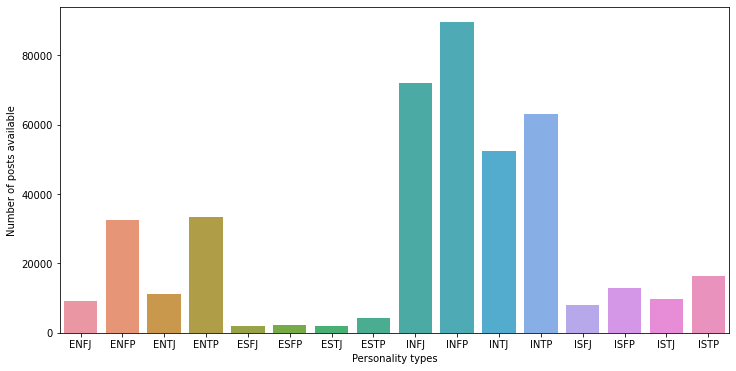

In [8]:
plt.figure(figsize = (12,6))
sns.barplot(x='type',y='num_of_posts',data=comments_by_type)
plt.xlabel('Personality types')
plt.ylabel('Number of posts available')
plt.show()

In [9]:
#consider only posts greater than or eaual to 50
#df=df[df['num_of_posts']>=50]

In [10]:
df.head()

,type,posts,num_of_posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,50
1,ENTP,'I'm finding the lack of me in these posts ver...,50
2,INTP,'Good one _____ https://www.youtube.com/wat...,50
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",50
4,ENTJ,'You're fired.|||That's another silly misconce...,50


In [11]:
df['type'].value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

In [12]:
! pip install emoji

     |████████████████████████████████| 174 kB 5.3 MB/s 
  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170298 sha256=d7042ed2049c0dd7b1455c66d05eb8217178017415f83719455eadf2c5edc646
  Stored in directory: /root/.cache/pip/wheels/03/8b/d7/ad579fbef83c287215c0caab60fb0ae0f30c4d7ce5f580eade
Successfully built emoji


In [13]:
import regex as re,emoji,string

In [14]:
def find_emoji(text):

    emoji_list = []
    data = re.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI['en'] for char in word):
            emoji_list.append(word)
    
    return emoji_list

In [15]:
#[[print(find_emoji(x)) for x in post.split("|||") if len(find_emoji(x))>0] for post in df['posts']]

In [16]:
df['emoji_count']=[len(find_emoji(post)) for post in df['posts']]

In [17]:
df.head()

,type,posts,num_of_posts,emoji_count
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,50,0
1,ENTP,'I'm finding the lack of me in these posts ver...,50,0
2,INTP,'Good one _____ https://www.youtube.com/wat...,50,0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",50,0
4,ENTJ,'You're fired.|||That's another silly misconce...,50,0


In [18]:
df['emoji_count'].value_counts()

0     8536
1       88
2       22
3       11
4        6
5        3
6        2
46       1
55       1
42       1
8        1
96       1
11       1
14       1
Name: emoji_count, dtype: int64

In [19]:
df['emojis']=[find_emoji(post) for post in df['posts']]

In [20]:
df[df['emoji_count']>0].head()

,type,posts,num_of_posts,emoji_count,emojis
83,ENTJ,'Bump|||Escobar and Co. Escobar- ENTJ Gustavo...,50,3,"[😂, 😂, 😂]"
161,INTJ,'Above and on top of that what really irked th...,50,1,[™]
182,INTP,'What are you? A weakling? You're just going t...,50,1,[♥]
189,ISTJ,"'If it's not what you expected, try browns ins...",50,1,[😊]
396,ENFP,The ENFP Te Bitch Slap Revealed This has happ...,50,4,"[😁, 😂, 😋, 😱]"


In [21]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from textblob import TextBlob

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [24]:
sw = stopwords.words('english')

def clean_text(text):
    text = text.lower()
    text = re.sub('@', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r"[^a-zA-Z ]+", "", text)
    
    #Tokenize the data
    text = nltk.word_tokenize(text)
    #Remove stopwords
    text = [w for w in text if w not in sw]
    return text

In [25]:
df['clean_posts']=df['posts'].apply(lambda x: clean_text(x))

In [26]:
df.head()

,type,posts,num_of_posts,emoji_count,emojis,clean_posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,50,0,[],"[intj, moments, sportscenter, top, ten, plays,..."
1,ENTP,'I'm finding the lack of me in these posts ver...,50,0,[],"[im, finding, lack, posts, alarmingsex, boring..."
2,INTP,'Good one _____ https://www.youtube.com/wat...,50,0,[],"[good, one, course, say, know, thats, blessing..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",50,0,[],"[dear, intp, enjoyed, conversation, day, esote..."
4,ENTJ,'You're fired.|||That's another silly misconce...,50,0,[],"[youre, firedthats, another, silly, misconcept..."


In [27]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [28]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [29]:
#Lemmatizer
lemmatizer = WordNetLemmatizer()
def lem(text):
    text = [lemmatizer.lemmatize(t) for t in text]
    text = [lemmatizer.lemmatize(t, 'v') for t in text]
    return text
df['clean_posts'] = df['clean_posts'].apply(lambda x: lem(x))

In [30]:
df.head(10)

,type,posts,num_of_posts,emoji_count,emojis,clean_posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,50,0,[],"[intj, moment, sportscenter, top, ten, play, p..."
1,ENTP,'I'm finding the lack of me in these posts ver...,50,0,[],"[im, find, lack, post, alarmingsex, bore, posi..."
2,INTP,'Good one _____ https://www.youtube.com/wat...,50,0,[],"[good, one, course, say, know, thats, bless, c..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",50,0,[],"[dear, intp, enjoy, conversation, day, esoteri..."
4,ENTJ,'You're fired.|||That's another silly misconce...,50,0,[],"[youre, firedthats, another, silly, misconcept..."
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...,50,0,[],"[science, perfect, scientist, claim, scientifi..."
6,INFJ,"'No, I can't draw on my own nails (haha). Thos...",50,0,[],"[cant, draw, nail, haha, do, professional, nai..."
7,INTJ,'I tend to build up a collection of things on ...,50,0,[],"[tend, build, collection, thing, desktop, use,..."
8,INFJ,"I'm not sure, that's a good question. The dist...",50,0,[],"[im, sure, thats, good, question, distinction,..."
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...,50,0,[],"[position, actually, let, go, person, due, var..."


In [31]:
#From lists of comments to a single list containing all words      
all_words=[]        
#for i in range(len(df)):
    #all_words = all_words + df['clean_posts'][i]

In [32]:
#5348769
#len(all_words)

In [33]:
import numpy as np

In [34]:
#len(np.unique(all_words))

In [35]:
df['clean_posts1']=[str(thing) for thing in df['clean_posts']]

In [36]:
#blob=TextBlob(df['clean_posts'][0])

In [37]:
sentiment = []
for i in range(len(df)):
    blob = TextBlob(df['clean_posts1'][i])
    for sentence in blob.sentences:
        sentiment.append(sentence.sentiment.polarity)
df['sentiment']=sentiment

In [38]:
df.head(10)

,type,posts,num_of_posts,emoji_count,emojis,clean_posts,clean_posts1,sentiment
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,50,0,[],"[intj, moment, sportscenter, top, ten, play, p...","['intj', 'moment', 'sportscenter', 'top', 'ten...",0.098116
1,ENTP,'I'm finding the lack of me in these posts ver...,50,0,[],"[im, find, lack, post, alarmingsex, bore, posi...","['im', 'find', 'lack', 'post', 'alarmingsex', ...",0.098953
2,INTP,'Good one _____ https://www.youtube.com/wat...,50,0,[],"[good, one, course, say, know, thats, bless, c...","['good', 'one', 'course', 'say', 'know', 'that...",0.129627
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",50,0,[],"[dear, intp, enjoy, conversation, day, esoteri...","['dear', 'intp', 'enjoy', 'conversation', 'day...",0.096569
4,ENTJ,'You're fired.|||That's another silly misconce...,50,0,[],"[youre, firedthats, another, silly, misconcept...","['youre', 'firedthats', 'another', 'silly', 'm...",0.011339
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...,50,0,[],"[science, perfect, scientist, claim, scientifi...","['science', 'perfect', 'scientist', 'claim', '...",0.067968
6,INFJ,"'No, I can't draw on my own nails (haha). Thos...",50,0,[],"[cant, draw, nail, haha, do, professional, nai...","['cant', 'draw', 'nail', 'haha', 'do', 'profes...",0.110950
7,INTJ,'I tend to build up a collection of things on ...,50,0,[],"[tend, build, collection, thing, desktop, use,...","['tend', 'build', 'collection', 'thing', 'desk...",0.090952
8,INFJ,"I'm not sure, that's a good question. The dist...",50,0,[],"[im, sure, thats, good, question, distinction,...","['im', 'sure', 'thats', 'good', 'question', 'd...",0.073609
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...,50,0,[],"[position, actually, let, go, person, due, var...","['position', 'actually', 'let', 'go', 'person'...",0.161103


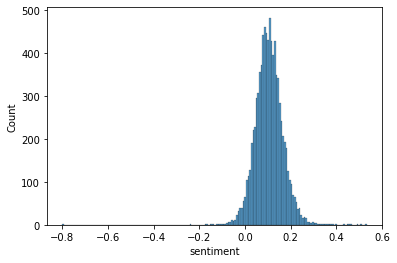

In [39]:
sns.histplot(data=df,x='sentiment')
plt.show()

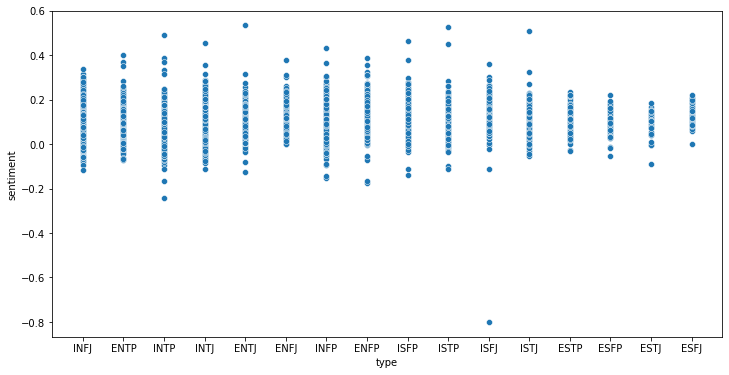

In [40]:
plt.figure(figsize = (12,6))
sns.scatterplot(x='type',y='sentiment',data=df)
plt.show()

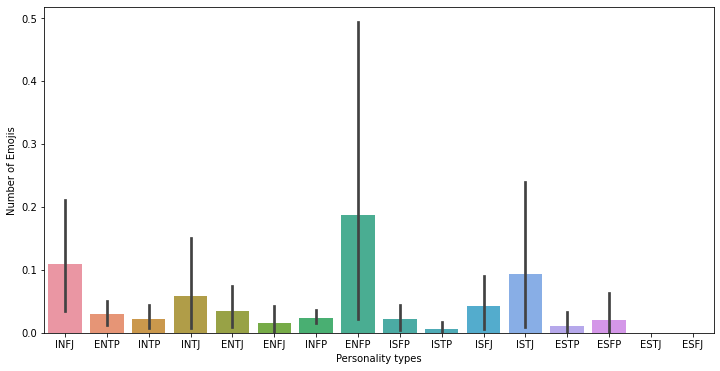

In [41]:
plt.figure(figsize = (12,6))
sns.barplot(x='type',y='emoji_count',data=df)
plt.xlabel('Personality types')
plt.ylabel('Number of Emojis')
plt.show()

In [42]:
# Add Peronality Type Columns
df['eori']=[x[0] for x in df['type']]
df['nors']=[x[1] for x in df['type']]
df['torf']=[x[2] for x in df['type']]
df['jorp']=[x[3] for x in df['type']]
df.head()

,type,posts,num_of_posts,emoji_count,emojis,clean_posts,clean_posts1,sentiment,eori,nors,torf,jorp
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,50,0,[],"[intj, moment, sportscenter, top, ten, play, p...","['intj', 'moment', 'sportscenter', 'top', 'ten...",0.098116,I,N,F,J
1,ENTP,'I'm finding the lack of me in these posts ver...,50,0,[],"[im, find, lack, post, alarmingsex, bore, posi...","['im', 'find', 'lack', 'post', 'alarmingsex', ...",0.098953,E,N,T,P
2,INTP,'Good one _____ https://www.youtube.com/wat...,50,0,[],"[good, one, course, say, know, thats, bless, c...","['good', 'one', 'course', 'say', 'know', 'that...",0.129627,I,N,T,P
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",50,0,[],"[dear, intp, enjoy, conversation, day, esoteri...","['dear', 'intp', 'enjoy', 'conversation', 'day...",0.096569,I,N,T,J
4,ENTJ,'You're fired.|||That's another silly misconce...,50,0,[],"[youre, firedthats, another, silly, misconcept...","['youre', 'firedthats', 'another', 'silly', 'm...",0.011339,E,N,T,J


**Extrovert Personality Type Analysis**

In [43]:
E_df = df[df['eori']=='E']
E_df.reset_index(inplace=True)
E_df.head()

,index,type,posts,num_of_posts,emoji_count,emojis,clean_posts,clean_posts1,sentiment,eori,nors,torf,jorp
0,1,ENTP,'I'm finding the lack of me in these posts ver...,50,0,[],"[im, find, lack, post, alarmingsex, bore, posi...","['im', 'find', 'lack', 'post', 'alarmingsex', ...",0.098953,E,N,T,P
1,4,ENTJ,'You're fired.|||That's another silly misconce...,50,0,[],"[youre, firedthats, another, silly, misconcept...","['youre', 'firedthats', 'another', 'silly', 'm...",0.011339,E,N,T,J
2,11,ENFJ,'https://www.youtube.com/watch?v=PLAaiKvHvZs||...,43,0,[],"[oi, go, break, month, ago, together, year, pl...","['oi', 'go', 'break', 'month', 'ago', 'togethe...",0.188021,E,N,F,J
3,22,ENTJ,'Now I'm interested. But too lazy to go resear...,50,0,[],"[im, interest, lazy, go, research, timeconsumi...","['im', 'interest', 'lazy', 'go', 'research', '...",0.081869,E,N,T,J
4,24,ENTJ,'Still going strong at just over the two year ...,50,0,[],"[still, go, strong, two, year, mark, make, not...","['still', 'go', 'strong', 'two', 'year', 'mark...",0.150040,E,N,T,J


In [44]:
all_Ewords=[]        
for i in range(len(E_df)):
  all_Ewords = all_Ewords + E_df['clean_posts'][i]
  #all_Ewords.append(E_df['clean_posts1'][i])

In [45]:
len(all_Ewords)

1231116

In [46]:
nlp_words = nltk.FreqDist(all_Ewords)

In [47]:
len(nlp_words)

96276

In [48]:
nlp_words.most_common(10) # Top 10 extrovert words in posts

[('like', 16402),
 ('think', 16098),
 ('im', 15238),
 ('get', 12020),
 ('dont', 11187),
 ('people', 10296),
 ('know', 9854),
 ('one', 8570),
 ('say', 8516),
 ('make', 7841)]

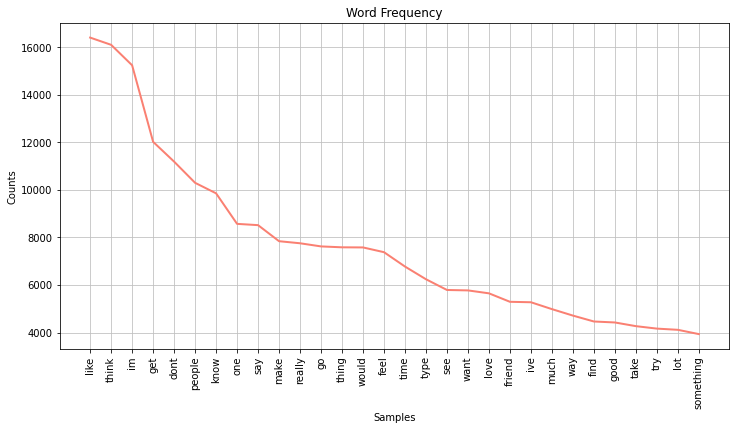

In [49]:
plt.figure(figsize = (12,6))
plotE = nlp_words.plot(30, color='salmon', title='Word Frequency') #Top 30 words frequency


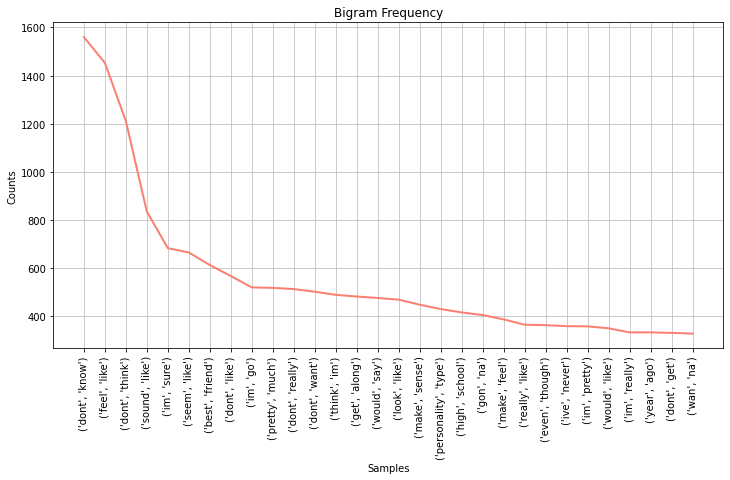

In [50]:
# Words most commonly used together.
bigrmE = list(nltk.bigrams(all_Ewords))
wordsE_2 = nltk.FreqDist(bigrmE)
plt.figure(figsize = (12,6))
wordsE_2.plot(30, color='salmon', title='Bigram Frequency')

**Introvert Personality Analysis**

In [51]:
I_df = df[df['eori']=='I']
I_df.reset_index(inplace=True)
I_df.head()

,index,type,posts,num_of_posts,emoji_count,emojis,clean_posts,clean_posts1,sentiment,eori,nors,torf,jorp
0,0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,50,0,[],"[intj, moment, sportscenter, top, ten, play, p...","['intj', 'moment', 'sportscenter', 'top', 'ten...",0.098116,I,N,F,J
1,2,INTP,'Good one _____ https://www.youtube.com/wat...,50,0,[],"[good, one, course, say, know, thats, bless, c...","['good', 'one', 'course', 'say', 'know', 'that...",0.129627,I,N,T,P
2,3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",50,0,[],"[dear, intp, enjoy, conversation, day, esoteri...","['dear', 'intp', 'enjoy', 'conversation', 'day...",0.096569,I,N,T,J
3,5,INTJ,'18/37 @.@|||Science is not perfect. No scien...,50,0,[],"[science, perfect, scientist, claim, scientifi...","['science', 'perfect', 'scientist', 'claim', '...",0.067968,I,N,T,J
4,6,INFJ,"'No, I can't draw on my own nails (haha). Thos...",50,0,[],"[cant, draw, nail, haha, do, professional, nai...","['cant', 'draw', 'nail', 'haha', 'do', 'profes...",0.110950,I,N,F,J


In [52]:
all_Iwords=[]        
for i in range(len(I_df)):
  all_Iwords = all_Iwords + I_df['clean_posts'][i]

In [53]:
len(all_Iwords)

4117653

In [54]:
nlp_wordsI = nltk.FreqDist(all_Iwords)
len(nlp_wordsI)

230899

In [55]:
nlp_wordsI.most_common(10)

[('like', 53576),
 ('think', 53406),
 ('im', 49360),
 ('dont', 39241),
 ('get', 37070),
 ('people', 34805),
 ('know', 31912),
 ('one', 28317),
 ('feel', 27924),
 ('say', 27584)]

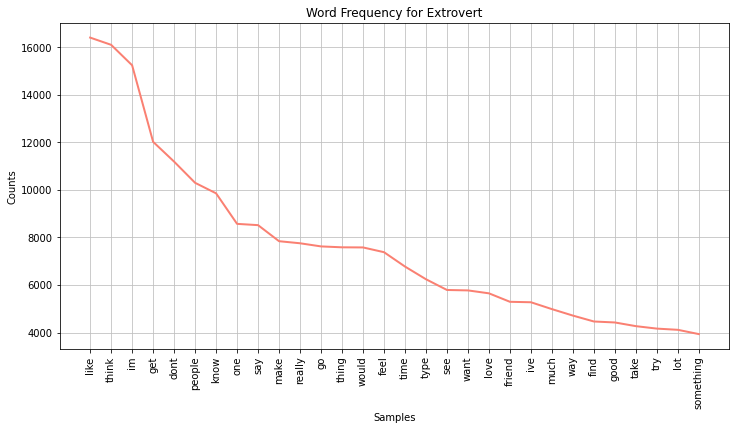

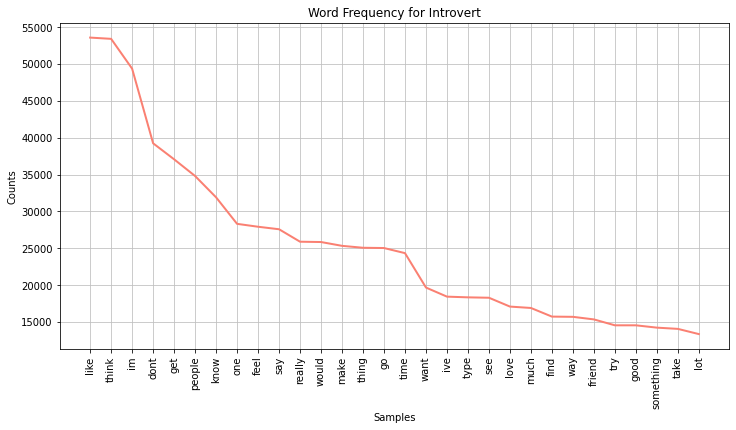

In [56]:
plt.figure(figsize = (12,6))
plotIE = nlp_words.plot(30, color='salmon', title='Word Frequency for Extrovert') #Top 30 words frequency
plt.figure(figsize = (12,6))
plotIE = nlp_wordsI.plot(30, color='salmon', title='Word Frequency for Introvert') #Top 30 words frequency

In [57]:
bigrmI = list(nltk.bigrams(all_Iwords))
wordsI_2 = nltk.FreqDist(bigrmI)

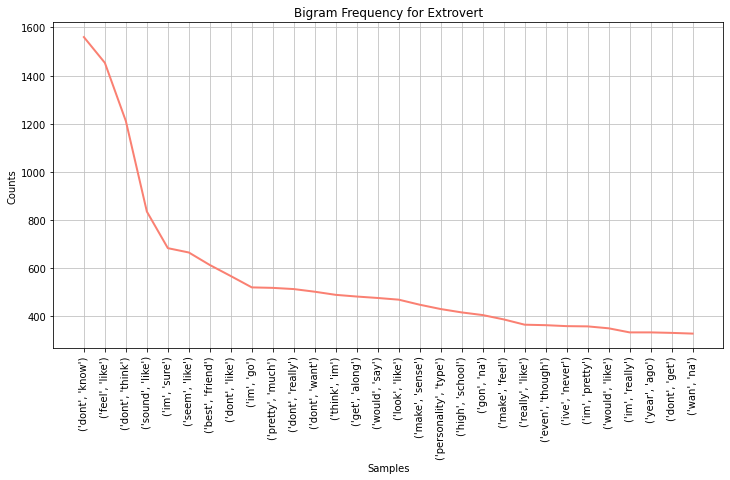

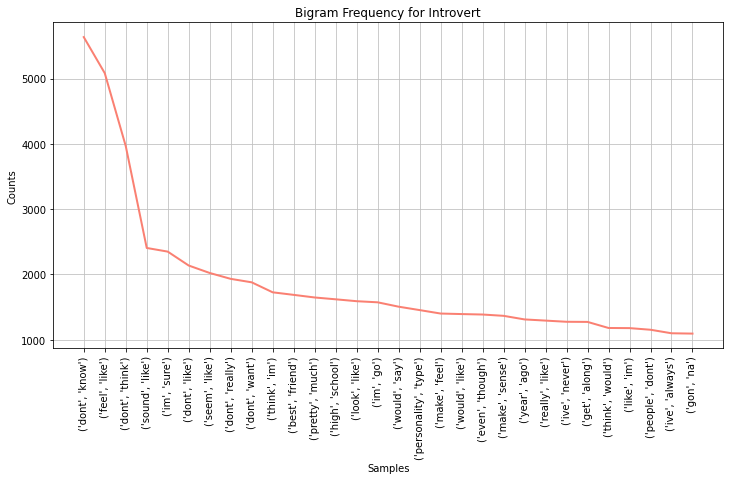

In [58]:
plt.figure(figsize = (12,6))
wordsE_2.plot(30, color='salmon', title='Bigram Frequency for Extrovert')
plt.figure(figsize = (12,6))
wordsI_2.plot(30, color='salmon', title='Bigram Frequency for Introvert')

In [59]:
df_emojis=df[df['emoji_count']>0]
df_emojis.reset_index(inplace=True)

In [60]:
df_emojis.head()

,index,type,posts,num_of_posts,emoji_count,emojis,clean_posts,clean_posts1,sentiment,eori,nors,torf,jorp
0,83,ENTJ,'Bump|||Escobar and Co. Escobar- ENTJ Gustavo...,50,3,"[😂, 😂, 😂]","[bumpescobar, co, escobar, entj, gustavo, istx...","['bumpescobar', 'co', 'escobar', 'entj', 'gust...",0.012337,E,N,T,J
1,161,INTJ,'Above and on top of that what really irked th...,50,1,[™],"[top, really, irk, people, try, roll, punch, t...","['top', 'really', 'irk', 'people', 'try', 'rol...",0.083056,I,N,T,J
2,182,INTP,'What are you? A weakling? You're just going t...,50,1,[♥],"[weakling, youre, go, sit, take, dont, stupid,...","['weakling', 'youre', 'go', 'sit', 'take', 'do...",0.106459,I,N,T,P
3,189,ISTJ,"'If it's not what you expected, try browns ins...",50,1,[😊],"[expect, try, brown, instead, definitely, pref...","['expect', 'try', 'brown', 'instead', 'definit...",0.029389,I,S,T,J
4,396,ENFP,The ENFP Te Bitch Slap Revealed This has happ...,50,4,"[😁, 😂, 😋, 😱]","[enfp, te, bitch, slap, reveal, happen, twice,...","['enfp', 'te', 'bitch', 'slap', 'reveal', 'hap...",0.179043,E,N,F,P


In [61]:
df_emojis['emojis'][0]

['😂', '😂', '😂']

In [62]:
all_emojis=[]        
for i in range(len(df_emojis)):
  all_emojis = all_emojis + df_emojis['emojis'][i]
  #all_Ewords.append(E_df['clean_posts1'][i])

In [63]:
nlp_emojis = nltk.FreqDist(all_emojis)
len(all_emojis)

488

In [64]:
nlp_emojis.most_common(10)

[('♥', 152),
 ('❤️', 45),
 ('🌹', 30),
 ('®', 29),
 ('😊', 19),
 ('™', 17),
 ('😂', 16),
 ('❤', 13),
 ('😄', 12),
 ('👏', 9)]

In [65]:
nlp_emojis.most_common(1)[0][0]

'♥'

In [69]:
import random

**Naive Bayes Classification analysis for Extroverts(E) and Introverts(I)**

In [72]:
# Find words (i.e keys) unique to Extroverts(E) and Introverts(I)
Ekeys = nlp_words.keys()
Ikeys = nlp_wordsI.keys()
#difference = Ekeys - IKeys
print(f"Total Extrover Words - {len(nlp_words)} ; Extrovert only words- {len(Ekeys - Ikeys)}")
print(f"Total Introvert Words - {len(nlp_wordsI)} ; Introvert only words - {len(Ikeys - Ekeys)}")
Eonlykeys = Ekeys - Ikeys
Ionlykeys = Ikeys - Ekeys

Total Extrover Words - 96276 ; Extrovert only words- 52555
Total Introvert Words - 230899 ; Introvert only words - 187178


In [195]:
#Create list words and correspoding classification (I or E)
EIfeatures=[]
for k in Eonlykeys:
  wdict={}
  wdict[k]=nlp_words[k]
  EIfeatures += [(wdict,'extrovert')]

for k in Ionlykeys:
  wdict={}
  wdict[k]=nlp_wordsI[k]
  EIfeatures += [(wdict,'introvert')]

In [196]:
len(EIfeatures)

239733

In [197]:
EIfeatures[0:10]

[({'couldsee': 1}, 'extrovert'),
 ({'allravenclaw': 1}, 'extrovert'),
 ({'sunne': 1}, 'extrovert'),
 ({'happyyyyyyy': 1}, 'extrovert'),
 ({'threadsighcantthinkofaname': 1}, 'extrovert'),
 ({'harmonically': 1}, 'extrovert'),
 ({'typesfwiw': 1}, 'extrovert'),
 ({'dishesevery': 1}, 'extrovert'),
 ({'looooovee': 1}, 'extrovert'),
 ({'comine': 1}, 'extrovert')]

In [198]:
random.shuffle(EIfeatures)

In [199]:
EIfeatures[0:10]

[({'churchthat': 1}, 'introvert'),
 ({'startkyle': 1}, 'introvert'),
 ({'workstudy': 4}, 'introvert'),
 ({'intpssigh': 1}, 'introvert'),
 ({'brothermaybe': 1}, 'extrovert'),
 ({'threadtheyre': 2}, 'introvert'),
 ({'nonfreewill': 1}, 'introvert'),
 ({'jenni': 2}, 'introvert'),
 ({'shaver': 1}, 'extrovert'),
 ({'vitally': 3}, 'introvert')]

In [91]:
from sklearn.model_selection import train_test_split

In [200]:
#Split into Test and Train data sets
x_train,x_test, = train_test_split(EIfeatures)

In [201]:
print(len(x_train),len(x_test))

179799 59934


In [95]:
from nltk.classify import NaiveBayesClassifier

In [148]:
#from sklearn.naive_bayes import GaussianNB

In [202]:
#Train NaiveBayes classifier
IntroExtro = NaiveBayesClassifier.train(x_train)

In [203]:
#Training accuracy score for NaiveBayes
nltk.classify.util.accuracy(IntroExtro, x_train)*100

100.0

In [204]:
#Testing data accuracy score for NaiveBayes
nltk.classify.util.accuracy(IntroExtro, x_test)*100

77.90069075983583

**Naive Bayes Classification analysis for Sensors(S) and Intuitives(N)**

In [205]:
df.head()

,type,posts,num_of_posts,emoji_count,emojis,clean_posts,clean_posts1,sentiment,eori,nors,torf,jorp
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,50,0,[],"[intj, moment, sportscenter, top, ten, play, p...","['intj', 'moment', 'sportscenter', 'top', 'ten...",0.098116,I,N,F,J
1,ENTP,'I'm finding the lack of me in these posts ver...,50,0,[],"[im, find, lack, post, alarmingsex, bore, posi...","['im', 'find', 'lack', 'post', 'alarmingsex', ...",0.098953,E,N,T,P
2,INTP,'Good one _____ https://www.youtube.com/wat...,50,0,[],"[good, one, course, say, know, thats, bless, c...","['good', 'one', 'course', 'say', 'know', 'that...",0.129627,I,N,T,P
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",50,0,[],"[dear, intp, enjoy, conversation, day, esoteri...","['dear', 'intp', 'enjoy', 'conversation', 'day...",0.096569,I,N,T,J
4,ENTJ,'You're fired.|||That's another silly misconce...,50,0,[],"[youre, firedthats, another, silly, misconcept...","['youre', 'firedthats', 'another', 'silly', 'm...",0.011339,E,N,T,J


In [206]:
S_df = df[df['nors']=='S']
S_df.reset_index(inplace=True)
print(S_df.head())
N_df = df[df['nors']=='N']
N_df.reset_index(inplace=True)
print(N_df.head())

   index  type  ... torf  jorp
0     27  ISFP  ...    F     P
1     40  ISTP  ...    T     P
2     48  ISFJ  ...    F     J
3     52  ISFJ  ...    F     J
4     66  ISFP  ...    F     P

[5 rows x 13 columns]
   index  type  ... torf  jorp
0      0  INFJ  ...    F     J
1      1  ENTP  ...    T     P
2      2  INTP  ...    T     P
3      3  INTJ  ...    T     J
4      4  ENTJ  ...    T     J

[5 rows x 13 columns]


In [207]:
all_Swords=[]        
for i in range(len(S_df)):
  all_Swords = all_Swords + S_df['clean_posts'][i]

all_Nwords=[]        
for i in range(len(N_df)):
  all_Nwords = all_Nwords + N_df['clean_posts'][i]

print(len(all_Swords),len(all_Nwords))

712628 4636141


In [208]:
nlp_Swords = nltk.FreqDist(all_Swords)
nlp_Nwords = nltk.FreqDist(all_Nwords)

In [210]:
Skeys = nlp_Swords.keys()
Nkeys = nlp_Nwords.keys()
#difference = Ekeys - IKeys
print(f"Total Sensor Words - {len(nlp_Swords)} ; Sensor only words- {len(Skeys - Nkeys)}")
print(f"Total Intuitive Words - {len(nlp_Nwords)} ; Intuitive only words - {len(Nkeys - Skeys)}")
Sonlykeys = Skeys - Nkeys
Nonlykeys = Nkeys - Skeys

Total Sensor Words - 63240 ; Sensor only words- 29287
Total Intuitive Words - 230899 ; Intuitive only words - 220214


In [213]:
SNfeatures=[]
for k in Sonlykeys:
  wdict={}
  wdict[k]=nlp_Swords[k]
  SNfeatures += [(wdict,'sensor')]

for k in Nonlykeys:
  wdict={}
  wdict[k]=nlp_Nwords[k]
  SNfeatures += [(wdict,'intutive')]
  
random.shuffle(SNfeatures)

In [214]:
print(len(SNfeatures))
x_train,x_test, = train_test_split(SNfeatures)
print(len(x_train),len(x_test))
SensorIntutive = NaiveBayesClassifier.train(x_train)
print(f"Model Score Accuracy on train data {nltk.classify.util.accuracy(SensorIntutive, x_train)*100}%")
print(f"Model Score Accuracy on test data {nltk.classify.util.accuracy(SensorIntutive, x_test)*100}%")

249501
187125 62376
Model Score Accuracy on train data 100.0%
Model Score Accuracy on test data 88.2935744517122%


**Naive Bayes Classification analysis for Thinkers(T) and Feelers(F)**

In [215]:
T_df = df[df['torf']=='T']
T_df.reset_index(inplace=True)
#print(S_df.head())
F_df = df[df['torf']=='F']
F_df.reset_index(inplace=True)
#print(N_df.head())

In [216]:
all_Twords=[]        
for i in range(len(T_df)):
  all_Twords = all_Twords + T_df['clean_posts'][i]

all_Fwords=[]        
for i in range(len(F_df)):
  all_Fwords = all_Fwords + F_df['clean_posts'][i]

print(len(all_Twords),len(all_Fwords))

2414428 2934341


In [217]:
nlp_Twords = nltk.FreqDist(all_Twords)
nlp_Fwords = nltk.FreqDist(all_Fwords)

In [219]:
Tkeys = nlp_Twords.keys()
Fkeys = nlp_Fwords.keys()
#difference = Ekeys - IKeys
print(f"Total Thinker Words - {len(nlp_Twords)} ; Thinker only words- {len(Tkeys - Fkeys)}")
print(f"Total Feeler Words - {len(nlp_Fwords)} ; Feeler only words - {len(Fkeys - Tkeys)}")
Tonlykeys = Tkeys - Fkeys
Fonlykeys = Fkeys - Tkeys

Total Thinker Words - 161098 ; Thinker only words- 109123
Total Feeler Words - 230899 ; Feeler only words - 122356


In [220]:
TFfeatures=[]
for k in Tonlykeys:
  wdict={}
  wdict[k]=nlp_Twords[k]
  TFfeatures += [(wdict,'thinker')]

for k in Fonlykeys:
  wdict={}
  wdict[k]=nlp_Fwords[k]
  TFfeatures += [(wdict,'feeler')]
  
random.shuffle(TFfeatures)

In [221]:
print(len(TFfeatures))
x_train,x_test, = train_test_split(TFfeatures)
print(len(x_train),len(x_test))
ThinkerFeeler = NaiveBayesClassifier.train(x_train)
print(f"Model Score Accuracy on train data {nltk.classify.util.accuracy(ThinkerFeeler, x_train)*100}%")
print(f"Model Score Accuracy on test data {nltk.classify.util.accuracy(ThinkerFeeler, x_test)*100}%")

231479
173609 57870
Model Score Accuracy on train data 100.0%
Model Score Accuracy on test data 52.83393813720407%


**Naive Bayes Classification analysis for Judgers(J) and Perceivers(P)**

In [222]:
J_df = df[df['jorp']=='J']
J_df.reset_index(inplace=True)
#print(S_df.head())
P_df = df[df['jorp']=='P']
P_df.reset_index(inplace=True)
#print(N_df.head())

In [223]:
all_Jwords=[]        
for i in range(len(J_df)):
  all_Jwords = all_Jwords + J_df['clean_posts'][i]

all_Pwords=[]        
for i in range(len(P_df)):
  all_Pwords = all_Pwords + P_df['clean_posts'][i]

print(len(all_Jwords),len(all_Pwords))

2133924 3214845


In [224]:
nlp_Jwords = nltk.FreqDist(all_Jwords)
nlp_Pwords = nltk.FreqDist(all_Pwords)

In [225]:
Jkeys = nlp_Jwords.keys()
Pkeys = nlp_Pwords.keys()
#difference = Ekeys - IKeys
print(f"Total Judger Words - {len(nlp_Jwords)} ; Judger only words- {len(Jkeys - Pkeys)}")
print(f"Total Perceiver Words - {len(nlp_Pwords)} ; Perceiver only words - {len(Pkeys - Jkeys)}")
Jonlykeys = Jkeys - Pkeys
Ponlykeys = Pkeys - Jkeys

Total Judger Words - 140374 ; Judger only words- 89185
Total Perciver Words - 194269 ; Perciver only words - 143080


In [226]:
JPfeatures=[]
for k in Jonlykeys:
  wdict={}
  wdict[k]=nlp_Jwords[k]
  JPfeatures += [(wdict,'judger')]

for k in Ponlykeys:
  wdict={}
  wdict[k]=nlp_Pwords[k]
  JPfeatures += [(wdict,'perceiver')]
  
random.shuffle(JPfeatures)

In [227]:
print(len(JPfeatures))
x_train,x_test, = train_test_split(JPfeatures)
print(len(x_train),len(x_test))
JudgerPerceiver = NaiveBayesClassifier.train(x_train)
print(f"Model Score Accuracy on train data {nltk.classify.util.accuracy(JudgerPerceiver, x_train)*100}%")
print(f"Model Score Accuracy on test data {nltk.classify.util.accuracy(JudgerPerceiver, x_test)*100}%")

232265
174198 58067
Model Score Accuracy on train data 100.0%
Model Score Accuracy on test data 61.5840322386209%


In [229]:
accuracy_percentage={'train':[100,100,100,100],
                     'test':[78,88.29,52.83,61.58]}
pd.DataFrame.from_dict(accuracy_percentage,orient='index',
                       columns=['Introvert - Extrovert', 'Sensor - Intuitives', 'Thinking - Feelers', 'Judgers - Perceivers'])

,Introvert - Extrovert,Sensor - Intuitives,Thinking - Feelers,Judgers - Perceivers
train,100,100.00,100.00,100.00
test,78,88.29,52.83,61.58


**Personality Prediction**

In [255]:
def ClassifyMBTI(input):
  input=clean_text(input)
  word_freq= nltk.FreqDist(input)
  wdict={}
  for k in word_freq:
    wdict[k]=word_freq[k]
  mbti=''
  for i in "INTJ":
   if (IntroExtro.classify(wdict) == 'introvert'):
        mbti += 'I'
  if (IntroExtro.classify(wdict) == 'extrovert'):
        mbti += 'E'
  if (SensorIntutive.classify(wdict) == 'sensor'):
        mbti += 'S'
  if (SensorIntutive.classify(wdict) == 'intutive'):
        mbti += 'N'
  if (ThinkerFeeler.classify(wdict) == 'thinker'):
        mbti += 'T'
  if (ThinkerFeeler.classify(wdict) == 'feeler'):
        mbti += 'F'
  if (JudgerPerceiver.classify(wdict) == 'judger'):
        mbti += 'J'
  if (JudgerPerceiver.classify(wdict) == 'perceiver'):
        mbti += 'P'
  return mbti

In [260]:
post1="So this happened last Saturday night around 6 on the greenway at Bethelview.  My daughter and I were walking back towards the parking lot.  We were about a mile in. There were Two women approaching both wearing a N95 mask walking two Dobermans (I think). As we passed, one of my cocker spaniels barked… and one lady sprayed a red substance that completely took my daughter and I down.  We couldn’t catch our breath, eyes and nose were on fire.  The ladies kept walking and never looked back. My daughter was totally freaked out.  I yelled what did you spray.  They just walked away.  No, sorry … Nothing!!!A nice lady came by on a bike and gave us some water so we could flush our eyes out and catch our breath.  I called the cops once back to the parking lot and they wanted from them to exit the trail.  The lady said it was “Bear spray”. She stated that one of her dogs had been attacked in the past so she was defending herself.  My dog barked, that is it.  Police said she had a right to use bear spray.  Just wanted to let everyone know, they are out there and will use the spray even if it’s not justified."
out1=ClassifyMBTI(post1)
print(out1)
mbti_fre=nltk.FreqDist(out1)
mbti_fre.most_common(4)

ENFJ


[('E', 1), ('N', 1), ('F', 1), ('J', 1)]

In [265]:
post1 = "I don’t usually take the time to post a negative review, but the experience I had today was so unbelievable I feel I must post. Hopefully some of you will see this and not waste your time going to this horrible store. I Went to Karen’s fabrics on Main Street (Alpharetta)today. Needed to look through a book of fabric samples for a project we have. We had called the store a few days ago to be sure they had the brand we were looking for. When I got there, I saw one Person working in the store, helping some other people. I stood patiently for over 10 minutes at the sales desk, as I just needed to be pointed in the right direction to look through fabric samples. The lady who was on the floor was ignoring me the entire time. I then saw that there was another person in a side office.  She was using the computer. When I asked if she could help me she said no she was busy helping someone else. Now for the 10 minutes I had been there, she had not left that room, and there was no one in there with her. Once again, all she had to do was ask me what I needed help with and point me to the fabric book so I could look for what I needed. She was the most rude person of any business I can recall going to in at least a decade. She was very snotty with me, refused to even ask what I needed. I have never experienced such horrible service in Alpharetta. I have worked in retail in the past, and part of the job is being able to greet customers even when you’re busy doing something. I would never give this store any business. Please do not waste your time going here. Parking is not easy, and when you finally get a space only to be treated like garbage…"
out1=ClassifyMBTI(post1)
print(out1)
mbti_fre=nltk.FreqDist(out1)
mbti_fre.most_common(4)

IIIINFP


[('I', 4), ('N', 1), ('F', 1), ('P', 1)]

In [266]:
post1 = "I would be interested in a good attorney for this as well. I just lost my brother-n-law at Northside Forsyth! Last Sunday, we were told that he was doing good and should be able to come home Wednesday or Thursday of last week, then we were told on Wednesday that he needed more oxygen so they were getting ready to move him to the PCU floor, which didn’t happen, then Thursday morning we got a call from the ICU dr saying we needed to get to the hospital ASAP that he wasn’t good! We got there and found out he had went into cardiac arrest early that morning and was then put on a ventilator! His organs had started shutting down as well due to the lack of oxygen, that he would have gotten if they would have moved him when they said they were. Instead, he laid there all evening and night suffering and getting worse by the hour, until his heart couldn’t take it anymore! He was at their mercy and they failed him!"
out1=ClassifyMBTI(post1)
print(out1)
mbti_fre=nltk.FreqDist(out1)
mbti_fre.most_common(4)

ENFP


[('E', 1), ('N', 1), ('F', 1), ('P', 1)]

In [267]:
pip install wordcloud

In [269]:
from wordcloud import WordCloud

In [272]:
def listtoString(allwords):
  str1=""
  for w in allwords:
    str1+=w
  return str1

In [274]:
#wc=WordCloud().generate(listtoString(all_Ewords))